# Data Exploration

## Data Prep

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Reading in .csv files into two DataFrames, 'the_df' which contains predictions for city by post title, and
# 'words_df' that contains predictions for city by individual word
# Dropping 'Unnamed: 0' columns

the_df = pd.read_csv('data/titles_df.csv')
words_df = pd.read_csv('data/words_df.csv')
the_df.drop(columns = 'Unnamed: 0', inplace=True)
words_df.drop(columns = 'Unnamed: 0', inplace=True)

In [3]:
the_df.head(3)

,actual,predicted,title
0,Austin,Austin,All the cursed places you can name
1,sanfrancisco,sanfrancisco,City officials warn residents to beware blessi...
2,sanfrancisco,sanfrancisco,I made a Sutro Tower 3D laser cut wooden model...


In [4]:
words_df.head(3)

,word,city
0,00,Denver
1,000,Austin
2,00am,Atlanta


In [6]:
# Instantiating a Sentiment Intensity Analyzer and creating new columns in both the word and title DataFrames
# that show the sentiment of the word or title. Columns are created that represent how negative, neutral, and
# positive a given post or word is. The compound score represents the overall sentiment of the post.

sia = SentimentIntensityAnalyzer()
title_scores = []
for each in the_df['title']:
    each_scored = sia.polarity_scores(each)
    title_scores.append(each_scored)
title_scores_df = pd.DataFrame(title_scores)
the_df['score'] = title_scores_df['compound']
the_df['negative'] = title_scores_df['neg']
the_df['positive'] = title_scores_df['pos']
the_df['neutral'] = title_scores_df['neu']

In [65]:
sia = SentimentIntensityAnalyzer()
word_scores = []
for each in words_df['word']:
    each_scored = sia.polarity_scores(each)
    word_scores.append(each_scored)
word_scores_df = pd.DataFrame(word_scores)
words_df['score'] = word_scores_df['compound']
words_df['negative'] = word_scores_df['neg']
words_df['positive'] = word_scores_df['pos']
words_df['neutral'] = word_scores_df['neu']

In [66]:
the_df.head(3)

,actual,predicted,title,score,negative,positive,neutral
0,Austin,Austin,All the cursed places you can name,0.0000,0.000,0.000,1.000
1,sanfrancisco,sanfrancisco,City officials warn residents to beware blessi...,-0.1779,0.251,0.169,0.580
2,sanfrancisco,sanfrancisco,I made a Sutro Tower 3D laser cut wooden model...,0.7430,0.058,0.230,0.712


In [67]:
# Observing how many posts are attributed to each city. A narrow majority are attributed to Austin, but the
# number of posts predicted for each city are fairly consistent. 

the_df['predicted'].value_counts()

Austin          1039
sanfrancisco    1005
Atlanta          980
Denver           976
Name: predicted, dtype: int64

In [68]:
# Creating separate DataFrames for the TOTAL predicted posts for each city, the CORRECTLY attributed posts from 
# each city, and the INCORRECTLY attributed posts from each city

atl = the_df[the_df['predicted'] == 'Atlanta']
atx = the_df[the_df['predicted'] == 'Austin']
sfo = the_df[the_df['predicted'] == 'sanfrancisco']
den = the_df[the_df['predicted'] == 'Denver']

In [69]:
atl_correct = the_df[(the_df['predicted'] == 'Atlanta') & (the_df['actual'] == 'Atlanta')]
atx_correct = the_df[(the_df['predicted'] == 'Austin') & (the_df['actual'] == 'Austin')]
sfo_correct = the_df[(the_df['predicted'] == 'sanfrancisco') & (the_df['actual'] == 'sanfrancisco')]
den_correct = the_df[(the_df['predicted'] == 'Denver') & (the_df['actual'] == 'Denver')]
all_correct = the_df[the_df['predicted'] == the_df['actual']]

In [70]:
atl_incorrect = the_df[(the_df['predicted'] == 'Atlanta') & (the_df['actual'] != 'Atlanta')]
atx_incorrect = the_df[(the_df['predicted'] == 'Austin') & (the_df['actual'] != 'Austin')]
sfo_incorrect = the_df[(the_df['predicted'] == 'sanfrancisco') & (the_df['actual'] != 'sanfrancisco')]
den_incorrect = the_df[(the_df['predicted'] == 'Denver') & (the_df['actual'] != 'Denver')]
all_incorrect = the_df[the_df['predicted'] != the_df['actual']]

In [71]:
# Creating DataFrames for the collections of individual words the model associates with each city

atl_words = words_df[words_df['city'] == 'Atlanta']
atx_words = words_df[words_df['city'] == 'Austin']
sfo_words = words_df[words_df['city'] == 'sanfrancisco']
den_words = words_df[words_df['city'] == 'Denver']

## Visualizations

Text(0.5, 0.98, 'Positive and Negative')

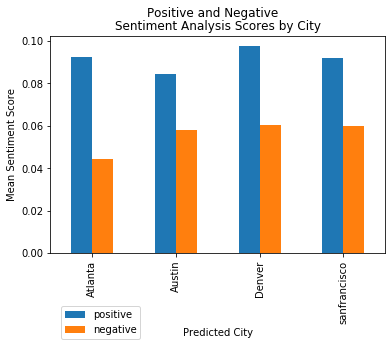

In [72]:
# Creating a chart that shows the average positive and negative sentiment scores for the post titles from each 
# city

ax = the_df.groupby(the_df['predicted']).mean()[['positive',
                                            'negative']].plot(kind='bar',
                                                              title='Sentiment Analysis Scores by City');
plt.legend(loc='upper center', bbox_to_anchor=(.15, -.22))
plt.xlabel('Predicted City')
plt.ylabel('Mean Sentiment Score');
plt.suptitle('Positive and Negative')

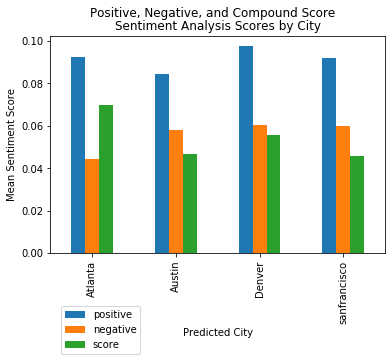

In [73]:
# Creating a chart that shows the average positive, negative, and compound sentiment scores for the post titles
# from each city


the_df.groupby(the_df['predicted']).mean()[['positive', 'negative', 'score']].plot(kind='bar',
                                                              title='Sentiment Analysis Scores by City');
plt.legend(loc='upper center', bbox_to_anchor=(.15, -.22))
plt.xlabel('Predicted City')
plt.ylabel('Mean Sentiment Score')
plt.suptitle('Positive, Negative, and Compound Score');

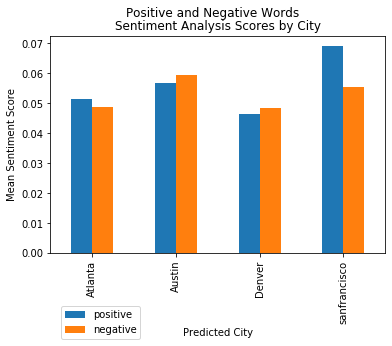

In [74]:
words_df.groupby(words_df['city']).mean()[['positive',
                                           'negative']].plot(kind='bar',
                                                              title='Sentiment Analysis Scores by City');
plt.legend(loc='upper center', bbox_to_anchor=(.15, -.22))
plt.xlabel('Predicted City')
plt.ylabel('Mean Sentiment Score')
plt.suptitle('Positive and Negative Words');

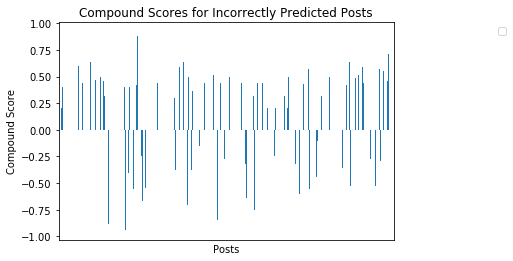

In [75]:
# Plotting the scores for incorrectly attributed posts

all_incorrect[['score']].plot(kind='bar');
plt.legend(bbox_to_anchor = (1.35, 1), labels=[])
plt.title('Compound Scores for Incorrectly Predicted Posts')
plt.xlabel('Posts')
plt.ylabel('Compound Score')
plt.xticks([]);

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


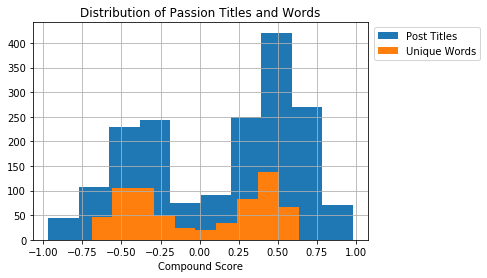

In [76]:
passion_words = words_df[words_df['score'] != 0]
passion_titles = the_df[the_df['score'] != 0]
passion_titles['score'].hist()
passion_words['score'].hist()
plt.title('Distribution of Passion Titles and Words')
plt.legend('hello', bbox_to_anchor = (1.35, 1), labels=['Post Titles','Unique Words'])
plt.xlabel('Compound Score');

## Content Exploration

### Posts from all correct and incorrect predictions that have the highest and lowest sentiment scores:

In [77]:
# Most positive of correct predictions

all_correct.sort_values('score', ascending=False).head()

,actual,predicted,title,score,negative,positive,neutral
751,Austin,Austin,"I had the pleasure of playing ""Amazing Grace"" ...",0.9788,0.000,0.470,0.530
2924,Atlanta,Atlanta,Best credit card for fair credit? I have a low...,0.9753,0.029,0.404,0.567
3787,Austin,Austin,I'm not sure if this is allowed but I recently...,0.9734,0.025,0.410,0.565
3488,Austin,Austin,"I had the pleasure of playing ""Amazing Grace"" ...",0.9666,0.000,0.396,0.604
1670,sanfrancisco,sanfrancisco,"Great apartment near The beach of Tangier,it s...",0.9664,0.000,0.329,0.671


In [78]:
# Most negative of correct predictions

all_correct.sort_values('score').head()

,actual,predicted,title,score,negative,positive,neutral
135,Atlanta,Atlanta,"1028 Aggravated assault charges, 856 charges o...",-0.9670,0.507,0.000,0.493
2416,Atlanta,Atlanta,3 arrested for plotting to kill metro couple; ...,-0.9260,0.510,0.000,0.490
1819,sanfrancisco,sanfrancisco,Trump starts war on Iran: ALL OUT Sat. Jan. 4 ...,-0.9231,0.257,0.054,0.689
3333,sanfrancisco,sanfrancisco,Oakland: Two men charged in laptop theft of Ch...,-0.9136,0.377,0.000,0.623
3445,sanfrancisco,sanfrancisco,"Violent assaults, insufficient care: Inside th...",-0.8885,0.573,0.134,0.293


In [79]:
# Most positive of incorrect predictions

all_incorrect.sort_values('score', ascending=False).head()

,actual,predicted,title,score,negative,positive,neutral
3409,sanfrancisco,Atlanta,"Live like a true ATL local in this spacious, v...",0.9169,0.042,0.270,0.688
3168,Austin,Atlanta,Want to have your Brain Mapped for free?! Elev...,0.8807,0.000,0.185,0.815
3104,Austin,Atlanta,Will you be our new fur mom/dad? Please messag...,0.7574,0.000,0.333,0.667
3323,Denver,Austin,Commerce City/ Henderson PLEASE READ --- THANK...,0.7404,0.000,0.511,0.489
3450,Atlanta,Austin,BOLO: My friend just got this Pomeranian last ...,0.7345,0.088,0.200,0.711


In [80]:
# Most negative of incorrect predictions

all_incorrect.sort_values('score').head()

,actual,predicted,title,score,negative,positive,neutral
3128,Denver,Atlanta,This place is full of fucking morons. Between ...,-0.9402,0.416,0.0,0.584
3062,Austin,sanfrancisco,DENIED NO MORE: KXAN investigation prompts cit...,-0.8825,0.530,0.0,0.470
3246,Atlanta,sanfrancisco,"I know this is a long shot, but my apartment g...",-0.8573,0.297,0.0,0.703
3425,sanfrancisco,Austin,Tfw you become a victim of property crime whil...,-0.8442,0.532,0.0,0.468
3954,sanfrancisco,Austin,All Lanes of SB I-280 Blocked After Multiple-V...,-0.7964,0.474,0.0,0.526


### Mean sentiment scores for each city by correct and incorrect predictions

In [81]:
# Atlanta correct and incorrect sentiments

print(atl_correct.mean())
print(atl_incorrect.mean())

score       0.064915
negative    0.045017
positive    0.089029
neutral     0.865949
dtype: float64
score       0.114847
negative    0.038168
positive    0.125189
neutral     0.836653
dtype: float64


In [82]:
# Austin correct and incorrect sentiments

print(atx_correct.mean())
print(atx_incorrect.mean())

score       0.049131
negative    0.057301
positive    0.084405
neutral     0.858296
dtype: float64
score       0.029178
negative    0.062970
positive    0.084045
neutral     0.852977
dtype: float64


In [83]:
# Denver correct and incorrect sentiments

print(den_correct.mean())
print(den_incorrect.mean())

score       0.051467
negative    0.060941
positive    0.094459
neutral     0.844604
dtype: float64
score       0.096372
negative    0.055442
positive    0.127116
neutral     0.817442
dtype: float64


In [84]:
# San Francisco correct and incorrect sentiments

print(sfo_correct.mean())
print(sfo_incorrect.mean())

score       0.045686
negative    0.061806
positive    0.091943
neutral     0.846254
dtype: float64
score       0.046916
negative    0.042641
positive    0.091630
neutral     0.865728
dtype: float64


In [85]:
# Exploring what type of posts are incorrectly identified across all cities

all_incorrect.mean()

score       0.068103
negative    0.051063
positive    0.105005
neutral     0.843933
dtype: float64

In [86]:
all_correct.mean()

score       0.052724
negative    0.056310
positive    0.089937
neutral     0.853754
dtype: float64

In [87]:
# Exploring which posts were incorrectly classified as Austin that were actually from
# Denver

atx_incorrect[atx_incorrect['actual'] == 'Denver'].head()

,actual,predicted,title,score,negative,positive,neutral
1482,Denver,Austin,Parking at night,0.0000,0.0,0.00,1.00
1899,Denver,Austin,You Know,0.0000,0.0,0.00,1.00
1930,Denver,Austin,Are you going to Goldfish tonight?,0.0000,0.0,0.00,1.00
2786,Denver,Austin,Suggestions for Good Moving Companies?,0.4404,0.0,0.42,0.58
3024,Denver,Austin,"Need a 'deep' dental cleaning, but can't affor...",0.0000,0.0,0.00,1.00


In [88]:
atx_incorrect['actual'].value_counts()

Denver          61
Atlanta         46
sanfrancisco    26
Name: actual, dtype: int64

**Most positive and most negative post titles overall**

In [89]:
# Most compoundly positive overall posts

the_df.sort_values('score', ascending = False).head()

,actual,predicted,title,score,negative,positive,neutral
751,Austin,Austin,"I had the pleasure of playing ""Amazing Grace"" ...",0.9788,0.000,0.470,0.530
2924,Atlanta,Atlanta,Best credit card for fair credit? I have a low...,0.9753,0.029,0.404,0.567
3787,Austin,Austin,I'm not sure if this is allowed but I recently...,0.9734,0.025,0.410,0.565
3488,Austin,Austin,"I had the pleasure of playing ""Amazing Grace"" ...",0.9666,0.000,0.396,0.604
1670,sanfrancisco,sanfrancisco,"Great apartment near The beach of Tangier,it s...",0.9664,0.000,0.329,0.671


In [90]:
# Most compoundly negative posts

the_df.sort_values('score', ascending = True).head()

,actual,predicted,title,score,negative,positive,neutral
135,Atlanta,Atlanta,"1028 Aggravated assault charges, 856 charges o...",-0.9670,0.507,0.000,0.493
3128,Denver,Atlanta,This place is full of fucking morons. Between ...,-0.9402,0.416,0.000,0.584
2416,Atlanta,Atlanta,3 arrested for plotting to kill metro couple; ...,-0.9260,0.510,0.000,0.490
1819,sanfrancisco,sanfrancisco,Trump starts war on Iran: ALL OUT Sat. Jan. 4 ...,-0.9231,0.257,0.054,0.689
3333,sanfrancisco,sanfrancisco,Oakland: Two men charged in laptop theft of Ch...,-0.9136,0.377,0.000,0.623


### Atlanta - positive and negative titles and words

In [91]:
# Positive compound scores for correct values

atl_correct.sort_values('score', ascending=False).head()

,actual,predicted,title,score,negative,positive,neutral
2924,Atlanta,Atlanta,Best credit card for fair credit? I have a low...,0.9753,0.029,0.404,0.567
1936,Atlanta,Atlanta,PLEASE HELP! Need help finding dental patients...,0.9428,0.000,0.695,0.305
2122,Atlanta,Atlanta,Scofflaw! Its my first time at this brewery. I...,0.9370,0.029,0.328,0.643
1891,Atlanta,Atlanta,Like craft beer and good food? Steady Hand Bee...,0.9337,0.000,0.282,0.718
24,Atlanta,Atlanta,FREE LOVING DOG TO LOVING HOME,0.9022,0.000,0.787,0.213


In [92]:
# Negative compound scores for correct values

atl_correct.sort_values('score').head()

,actual,predicted,title,score,negative,positive,neutral
135,Atlanta,Atlanta,"1028 Aggravated assault charges, 856 charges o...",-0.9670,0.507,0.0,0.493
2416,Atlanta,Atlanta,3 arrested for plotting to kill metro couple; ...,-0.9260,0.510,0.0,0.490
2908,Atlanta,Atlanta,Jerrold Nadler &amp; Adam Schiff raped and kil...,-0.8779,0.165,0.0,0.835
1932,Atlanta,Atlanta,Where the hell can I find sourdough bread in t...,-0.8283,0.462,0.0,0.538
2271,Atlanta,Atlanta,UNCHARTED 3 DRAKE 'S Deception //de traki SIN ...,-0.8038,0.446,0.0,0.554


In [93]:
# Positive compound scores for incorrect values

atl_incorrect.sort_values('score', ascending=False).head()

,actual,predicted,title,score,negative,positive,neutral
3409,sanfrancisco,Atlanta,"Live like a true ATL local in this spacious, v...",0.9169,0.042,0.270,0.688
3168,Austin,Atlanta,Want to have your Brain Mapped for free?! Elev...,0.8807,0.000,0.185,0.815
3104,Austin,Atlanta,Will you be our new fur mom/dad? Please messag...,0.7574,0.000,0.333,0.667
3979,Austin,Atlanta,Where’s the BEST Mac &amp; Cheese in town?,0.7125,0.000,0.413,0.587
3146,Austin,Atlanta,5.37$ for dinner lol. 2 coupons at H-E-B can’t...,0.6808,0.000,0.272,0.728


In [94]:
# Negative compound scores for incorrect values

atl_incorrect.sort_values('score').head()

,actual,predicted,title,score,negative,positive,neutral
3128,Denver,Atlanta,This place is full of fucking morons. Between ...,-0.9402,0.416,0.0,0.584
3156,Austin,Atlanta,Who ever said Monday nights downtown are dead.,-0.6486,0.381,0.0,0.619
3953,sanfrancisco,Atlanta,Ballot measure would tighten up rules for deal...,-0.5423,0.241,0.0,0.759
3849,Austin,Atlanta,Missing Dog- North Loop. This lady is from out...,-0.5267,0.128,0.0,0.872
3768,Austin,Atlanta,"""I've heard worse before in Eans ISD""",-0.4767,0.341,0.0,0.659


In [95]:
# Positive compound scores for individual words

atl_words.sort_values('score', ascending=False).head()

,word,city,score,negative,positive,neutral
2334,freedom,Atlanta,0.6369,0.0,1.0,0.0
611,awesome,Atlanta,0.6249,0.0,1.0,0.0
3331,loving,Atlanta,0.5994,0.0,1.0,0.0
3329,lovely,Atlanta,0.5859,0.0,1.0,0.0
2599,happy,Atlanta,0.5719,0.0,1.0,0.0


In [96]:
# Negative compound scores for individual words

atl_words.sort_values('score', ascending=True).head()

,word,city,score,negative,positive,neutral
3064,kill,Atlanta,-0.6908,1.0,0.0,0.0
5450,terrorist,Atlanta,-0.6908,1.0,0.0,0.0
2648,hell,Atlanta,-0.6808,1.0,0.0,0.0
258,abusive,Atlanta,-0.6369,1.0,0.0,0.0
6020,worst,Atlanta,-0.6249,1.0,0.0,0.0


### Austin- positive and negative titles and words

In [97]:
# Positive compound scores for correct values

atx_correct.sort_values('score', ascending=False).head()

,actual,predicted,title,score,negative,positive,neutral
751,Austin,Austin,"I had the pleasure of playing ""Amazing Grace"" ...",0.9788,0.000,0.470,0.530
3787,Austin,Austin,I'm not sure if this is allowed but I recently...,0.9734,0.025,0.410,0.565
3488,Austin,Austin,"I had the pleasure of playing ""Amazing Grace"" ...",0.9666,0.000,0.396,0.604
2822,Austin,Austin,Planning a trip from 2/5 to 2/10 to have fun w...,0.8999,0.000,0.524,0.476
325,Austin,Austin,I've been consistently releasing music since 2...,0.8957,0.000,0.262,0.738


In [98]:
# Negative compound scores for correct values

atx_correct.sort_values('score').head()

,actual,predicted,title,score,negative,positive,neutral
2857,Austin,Austin,Jerrold Nadler and Adam Schiff raped and kille...,-0.8779,0.189,0.000,0.811
3508,Austin,Austin,Hell no I’m not driving a minimum of 45 minute...,-0.8779,0.529,0.000,0.471
2807,Austin,Austin,'We are seeing an increase in violent crime' |...,-0.8625,0.401,0.085,0.515
1437,Austin,Austin,Some fat moron double parked and trapped all t...,-0.8591,0.422,0.000,0.578
2063,Austin,Austin,Stolen guns fuel uptick in Austin gun crime,-0.8442,0.645,0.000,0.355


In [99]:
# Positive compound scores for incorrect values

atx_incorrect.sort_values('score', ascending=False).head()

,actual,predicted,title,score,negative,positive,neutral
3323,Denver,Austin,Commerce City/ Henderson PLEASE READ --- THANK...,0.7404,0.000,0.511,0.489
3450,Atlanta,Austin,BOLO: My friend just got this Pomeranian last ...,0.7345,0.088,0.200,0.711
3933,Denver,Austin,Best restaurants to go to for Valentines day?,0.6369,0.000,0.375,0.625
781,Atlanta,Austin,Where to watch the Super Bowl?,0.5994,0.000,0.438,0.562
3305,sanfrancisco,Austin,PSA: Do not leave your car parked unattended o...,0.5884,0.000,0.231,0.769


In [100]:
# Negative compound scores for incorrect values

atx_incorrect.sort_values('score').head()

,actual,predicted,title,score,negative,positive,neutral
3425,sanfrancisco,Austin,Tfw you become a victim of property crime whil...,-0.8442,0.532,0.0,0.468
3954,sanfrancisco,Austin,All Lanes of SB I-280 Blocked After Multiple-V...,-0.7964,0.474,0.0,0.526
3017,Atlanta,Austin,Filming Aretha Franklin's biography downtown. ...,-0.7003,0.367,0.0,0.633
3529,sanfrancisco,Austin,L.A. Man Arrested In Kidnapping of Fort Bragg ...,-0.6369,0.257,0.0,0.743
3683,Denver,Austin,This sign means that there are those annoying ...,-0.5994,0.274,0.0,0.726


In [101]:
# Positive compound scores for individual words

atx_words.sort_values('score', ascending=False).head()

,word,city,score,negative,positive,neutral
4010,perfectly,Austin,0.6369,0.0,1.0,0.0
3267,lmao,Austin,0.5994,0.0,1.0,0.0
6044,xd,Austin,0.5859,0.0,1.0,0.0
5969,win,Austin,0.5859,0.0,1.0,0.0
907,brilliant,Austin,0.5859,0.0,1.0,0.0


In [102]:
# Negative compound scores for individual words

atx_words.sort_values('score', ascending=True).head()

,word,city,score,negative,positive,neutral
3652,murder,Austin,-0.6908,1.0,0.0,0.0
4383,raped,Austin,-0.6808,1.0,0.0,0.0
4384,rapes,Austin,-0.6705,1.0,0.0,0.0
2105,faggot,Austin,-0.6597,1.0,0.0,0.0
1721,devil,Austin,-0.6597,1.0,0.0,0.0


### Denver - positive and negative titles and words

In [103]:
# Positive compound scores for correct values

den_correct.sort_values('score', ascending=False).head()

,actual,predicted,title,score,negative,positive,neutral
1193,Denver,Denver,"Hi everyone! I don’t live in Denver, but I’m l...",0.8918,0.000,0.233,0.767
1484,Denver,Denver,Showing some love with Denver in calligraphy. ...,0.8908,0.000,0.602,0.398
930,Denver,Denver,My friend was murdered near I-25 and Evans. He...,0.8834,0.078,0.280,0.642
1875,Denver,Denver,Caught this thing in the S. Platte river last ...,0.8750,0.000,0.323,0.677
3031,Denver,Denver,Love it! Just sitting here on the L-line watch...,0.8718,0.000,0.331,0.669


In [104]:
# Negative compound scores for correct values

den_correct.sort_values('score').head()

,actual,predicted,title,score,negative,positive,neutral
1907,Denver,Denver,Judge denies mom's attempt to use red flag law...,-0.8807,0.405,0.0,0.595
600,Denver,Denver,"Denver police officer arrested, accused of sex...",-0.8442,0.645,0.0,0.355
3043,Denver,Denver,Guest Commentary: There is no room for the dea...,-0.8442,0.503,0.0,0.497
882,Denver,Denver,Thief breaking into homes in wheatridge area. ...,-0.8271,0.300,0.0,0.700
3579,Denver,Denver,RTD in Crisis Part 2: A Failure of Leadership,-0.8126,0.552,0.0,0.448


In [105]:
# Positive compound scores for incorrect values

den_incorrect.sort_values('score', ascending=False).head()

,actual,predicted,title,score,negative,positive,neutral
3389,sanfrancisco,Denver,Looks awesome!,0.6588,0.0,0.815,0.185
3039,Atlanta,Denver,Best Wings?,0.6369,0.0,0.808,0.192
3916,sanfrancisco,Denver,Best Indie Pop Acts in the City,0.6369,0.0,0.412,0.588
3840,Atlanta,Denver,Best cheap burger joints and thrift stores,0.6369,0.0,0.412,0.588
3318,sanfrancisco,Denver,Best place to chill while stoned?,0.6369,0.0,0.457,0.543


In [106]:
# Negative compound scores for incorrect values

den_incorrect.sort_values('score').head()

,actual,predicted,title,score,negative,positive,neutral
3981,sanfrancisco,Denver,Uber going the wrong way on one way street,-0.5209,0.296,0.0,0.704
859,sanfrancisco,Denver,Lost Dog!!!,-0.4898,0.761,0.0,0.239
3676,Atlanta,Denver,Lawyer Needed for Recent Traffic Injury,-0.4215,0.359,0.0,0.641
3141,Atlanta,Denver,Having trouble finding canoe-cut beef marrow b...,-0.4019,0.231,0.0,0.769
3406,Austin,Denver,UFC Fights?,-0.4019,0.730,0.0,0.270


In [107]:
# Positive compound scores for individual words

den_words.sort_values('score', ascending=False).head()

,word,city,score,negative,positive,neutral
754,best,Denver,0.6369,0.0,1.0,0.0
2516,greatest,Denver,0.6369,0.0,1.0,0.0
2514,great,Denver,0.6249,0.0,1.0,0.0
2483,gorgeous,Denver,0.6124,0.0,1.0,0.0
407,amazing,Denver,0.5859,0.0,1.0,0.0


In [108]:
# Negative compound scores for individual words

den_words.sort_values('score', ascending=True).head()

,word,city,score,negative,positive,neutral
3065,killed,Denver,-0.6705,1.0,0.0,0.0
3653,murdered,Denver,-0.6597,1.0,0.0,0.0
2037,evil,Denver,-0.6597,1.0,0.0,0.0
3054,kia,Denver,-0.6369,1.0,0.0,0.0
5812,violence,Denver,-0.6249,1.0,0.0,0.0


### San Francisco - positive and negative titles and words

In [109]:
# Positive compound scores for correct values

sfo_correct.sort_values('score', ascending=False).head()

,actual,predicted,title,score,negative,positive,neutral
1670,sanfrancisco,sanfrancisco,"Great apartment near The beach of Tangier,it s...",0.9664,0.000,0.329,0.671
1352,sanfrancisco,sanfrancisco,PSA: SF Fire Credit Union has FREE Coinstar an...,0.9663,0.040,0.387,0.573
995,sanfrancisco,sanfrancisco,"(Follow-up) Thanks again, San Francisco! You w...",0.9401,0.000,0.411,0.589
1235,sanfrancisco,sanfrancisco,I’ll be in SF for 2.5 days... What are must ea...,0.9353,0.000,0.354,0.646
1789,sanfrancisco,sanfrancisco,"This was my first time visiting San Francisco,...",0.9348,0.039,0.251,0.710


In [110]:
# Negative compound scores for correct values

sfo_correct.sort_values('score').head()

,actual,predicted,title,score,negative,positive,neutral
1819,sanfrancisco,sanfrancisco,Trump starts war on Iran: ALL OUT Sat. Jan. 4 ...,-0.9231,0.257,0.054,0.689
3333,sanfrancisco,sanfrancisco,Oakland: Two men charged in laptop theft of Ch...,-0.9136,0.377,0.000,0.623
3445,sanfrancisco,sanfrancisco,"Violent assaults, insufficient care: Inside th...",-0.8885,0.573,0.134,0.293
3432,sanfrancisco,sanfrancisco,Suspects arrested in SF's 3rd murder of black ...,-0.8807,0.505,0.000,0.495
2161,sanfrancisco,sanfrancisco,"New DA says focus on sane criminals, but what ...",-0.8807,0.327,0.000,0.673


In [111]:
# Positive compound scores for incorrect values

sfo_incorrect.sort_values('score', ascending=False).head()

,actual,predicted,title,score,negative,positive,neutral
3735,Atlanta,sanfrancisco,Took advantage of the beautiful weather yester...,0.7096,0.0,0.541,0.459
3662,Atlanta,sanfrancisco,Picturesque places in the area for urban photo...,0.6969,0.0,0.344,0.656
3249,Atlanta,sanfrancisco,"If you want a sweet, calm pibble, Moon is your...",0.6808,0.0,0.320,0.680
3260,Austin,sanfrancisco,Please support investing in mobility in the city,0.6124,0.0,0.455,0.545
1793,Austin,sanfrancisco,Beautiful view from my office.,0.5994,0.0,0.494,0.506


In [112]:
# Negative compound scores for incorrect values

sfo_incorrect.sort_values('score').head()

,actual,predicted,title,score,negative,positive,neutral
3062,Austin,sanfrancisco,DENIED NO MORE: KXAN investigation prompts cit...,-0.8825,0.530,0.00,0.470
3246,Atlanta,sanfrancisco,"I know this is a long shot, but my apartment g...",-0.8573,0.297,0.00,0.703
3549,Austin,sanfrancisco,Meet Fletch! The owner was denied Visa after g...,-0.7500,0.166,0.05,0.784
3331,Atlanta,sanfrancisco,Cobb County serial rapist identified 21 years ...,-0.7096,0.353,0.00,0.647
3193,Denver,sanfrancisco,Pedestrian hit and killed by Adams County Sheriff,-0.6705,0.391,0.00,0.609


In [113]:
# Positive compound scores for individual words

sfo_words.sort_values('score', ascending=False).head()

,word,city,score,negative,positive,neutral
2459,glorious,sanfrancisco,0.6369,0.0,1.0,0.0
3327,love,sanfrancisco,0.6369,0.0,1.0,0.0
906,brightest,sanfrancisco,0.6124,0.0,1.0,0.0
5306,super,sanfrancisco,0.5994,0.0,1.0,0.0
3328,loved,sanfrancisco,0.5994,0.0,1.0,0.0


In [ ]:
# Negative compound scores for individual words

sfo_words.sort_values('score', ascending=True).head()